## Homework 10

In this homework, you are going to use and compare two different trackers (of your liking) and compare the results.

### Step 1
Decide what video you are going to use for this homework, select an object and generate the template. You can use any video you want (your own, from Youtube, etc.)
and track any object you want (e.g. a car, a pedestrian, etc.).

### Step 2
Initialize a tracker (e.g. KCF).

### Step 3
Run the tracker on the video and the selected object. Run the tracker for around 10-15 frames.

### Step 4
For each frame, print the bounding box on the image and save it.

### Step 5
Select a different tracker (e.g. CSRT) and repeat steps 2, 3 and 4.

### Step 6
Compare the results:
* Do you see any differences? If so, what are they?
* Does one tracker perform better than the other? In what way?

In [6]:
### Step 1
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

stream = cv2.VideoCapture("17000628-hd_1920_1080_60fps.mp4")

ret, frame = stream.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

tgtRect = [1050,70,1160,320]
tgtBbox = [tgtRect[0], tgtRect[1], tgtRect[2]-tgtRect[0], tgtRect[3]-tgtRect[1]]

In [7]:
### Step 2
trackerKCF = cv2.TrackerKCF_create()
trackerKCF.init(frame, tgtBbox)
trackerCSRT = cv2.TrackerCSRT_create()
trackerCSRT.init(frame, tgtBbox)

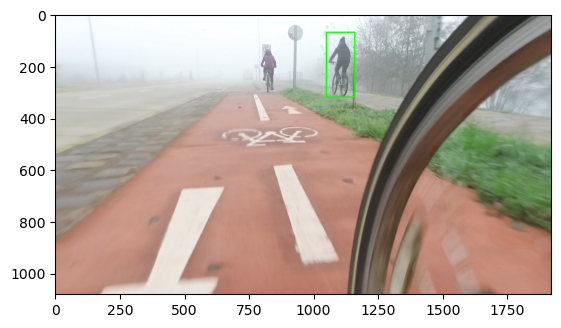

In [8]:
cv2.rectangle(frame, tgtRect[:2], tgtRect[2:], (0, 255, 0), 3)
plt.imshow(frame)
plt.show(), plt.draw()    
plt.waitforbuttonpress(0.1)
plt.clf()

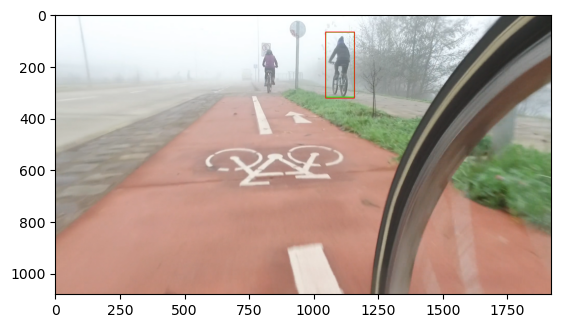

C:\Users\STOIANOV\AppData\Local\Temp\ipykernel_28676\904826707.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.waitforbuttonpress(0.1)


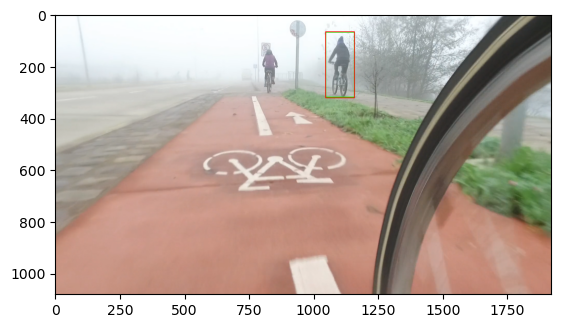

<Figure size 640x480 with 0 Axes>

In [15]:
def drawBox(img, bbox, clr):
    cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), clr, 2)
    
#while True:
for i in range(2):
    ret, frame = stream.read()
    
    if not ret:
        print("EOF reached")
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    kcfResult, kcfBbox = trackerKCF.update(frame)
    csrtResult, csrtBbox = trackerCSRT.update(frame)
    if kcfResult:
        drawBox(frame, kcfBbox, (0, 255, 0))

    if csrtResult:
        drawBox(frame, csrtBbox, (255, 0, 0))
        
    plt.imshow(frame)
    plt.show(), plt.draw()    
    plt.waitforbuttonpress(0.1)
    plt.clf()
    
#    time.sleep(0.1)